# Fantasy Book Analysis

## Introduction

The goal of this project is to analyze data from Goodreads (https://www.goodreads.com/), with a focus on books of the Fantasy genre. I will aim to retrieve insights such as:
- Are specific sub-genres (epic, dark, romance) rated higher?
- Does publication year affect ratings?
- Do longer fantasy books get higher ratings?
- How did the ratings/views change over the last few years?

### Data

The data used in this exercise will be downloaded from Kaggle (https://www.kaggle.com/datasets/middlelight/goodreadsbookswithgenres). It includes information about genre, publisher, average review, etc. Let's take a look at the data.

In [1]:
# install libraries
import sys
#!"{sys.executable}" -m pip install -U pip
#!"{sys.executable}" -m pip install pandas numpy seaborn matplotlib
#!"{sys.executable}" -m pip install scipy
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# read in data
books = pd.read_csv("data/Goodreads_books_with_genres.csv")

## Exploring the Dataset

Before doing any analysis we will first explore the data. How many rows and columns do we have? What are some descriptive statistics we can use to gain some insights from the data? Will we need to perform data cleaning to proceed with our analysis?


In [2]:
# how many rows and cols
print(books.shape)

(11127, 13)


In [3]:
# view the first 5 rows
books.head()

,Book Id,Title,Author,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,genres
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,"Fantasy;Young Adult;Fiction;Fantasy,Magic;Chil..."
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,"Fantasy;Young Adult;Fiction;Fantasy,Magic;Chil..."
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic,"Fantasy;Fiction;Young Adult;Fantasy,Magic;Chil..."
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,"Fantasy;Fiction;Young Adult;Fantasy,Magic;Chil..."
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic,"Fantasy;Young Adult;Fiction;Fantasy,Magic;Adve..."


We have 11,127 rows and 13 columns. The columns include information about the publication year, authors, ISBN, genres, and other important aspects that we will explore and use. Let's now see what types are the columns.

In [4]:
books.info()
list(books.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Book Id             11127 non-null  int64  
 1   Title               11127 non-null  object 
 2   Author              11127 non-null  object 
 3   average_rating      11127 non-null  float64
 4   isbn                11127 non-null  object 
 5   isbn13              11127 non-null  int64  
 6   language_code       11127 non-null  object 
 7   num_pages           11127 non-null  int64  
 8   ratings_count       11127 non-null  int64  
 9   text_reviews_count  11127 non-null  int64  
 10  publication_date    11127 non-null  object 
 11  publisher           11127 non-null  object 
 12  genres              11030 non-null  object 
dtypes: float64(1), int64(5), object(7)
memory usage: 1.1+ MB


['Book Id',
 'Title',
 'Author',
 'average_rating',
 'isbn',
 'isbn13',
 'language_code',
 'num_pages',
 'ratings_count',
 'text_reviews_count',
 'publication_date',
 'publisher',
 'genres']

`Book Id`, `isbn13`, `num_pages`, `ratings_count`, `text_reviews_count` are integer types, `average_rating` is a float, and the rest are objects (characters).

In [5]:
books.describe()

,Book Id,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11127.000000,11127.000000,1.112700e+04,11127.000000,1.112700e+04,11127.000000
mean,21310.938887,3.933631,9.759888e+12,336.376921,1.793641e+04,541.854498
std,13093.358023,0.352445,4.428964e+11,241.127305,1.124794e+05,2576.176608
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10287.000000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780586e+12,299.000000,7.450000e+02,46.000000
75%,32104.500000,4.135000,9.780873e+12,416.000000,4.993500e+03,237.500000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


In [6]:
books.describe(include=object)

,Title,Author,isbn,language_code,publication_date,publisher,genres
count,11127,11127,11127,11127,11127,11127,11030
unique,10352,6643,11127,27,3679,2292,9066
top,The Iliad,Stephen King,0439785960,eng,10/1/2005,Vintage,Fiction
freq,9,40,1,8911,56,318,65


Some books are repeated since only 10,352 of the 11,127 are unique. We also have 6643 authors, 27 languages, and 9066 different genres with the most frequent one being Fiction. The most frequent book is The Iliad and the most frequent author is Stephen King. 

Are there any missing values?

In [7]:
books.isna().sum().sort_values(ascending=False)

genres                97
Title                  0
Author                 0
average_rating         0
Book Id                0
isbn                   0
isbn13                 0
num_pages              0
language_code          0
ratings_count          0
text_reviews_count     0
publication_date       0
publisher              0
dtype: int64

The only column having (97) missing values is `genres`. 

### Plots

The next step to our exploratory analysis is to visualize the data with plots. 
Firstly, we will dive into the **ratings**. 

- Question 1. Are most books rated highly?
- Question 2. Which genre has the highest/lowest rated books?
- Question 3. Are fantasy books with languages other than English rated higher/less?
- Question 4. Is the distribution skewed?
- Question 5. Are ratings meaningful without popularity?

Let's look at Questions 1 & 4.

3.969849246231156


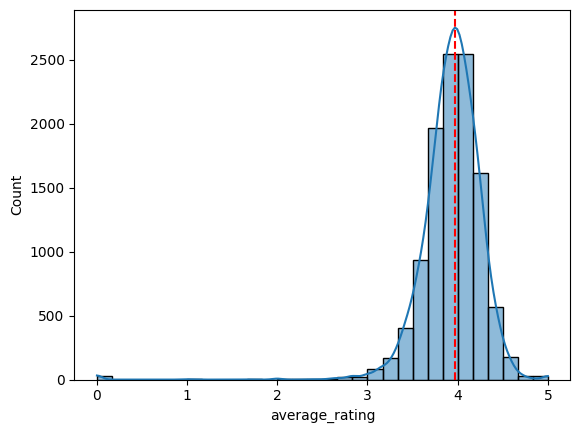

In [8]:
hist = sns.histplot(books["average_rating"], bins=30, kde=True)
# extract highest point
line = hist.lines[0]
x_hist, y_hist = line.get_data()

peak = x_hist[np.argmax(y_hist)]

print(peak)

plt.axvline(
    peak,
    color="red",
    linestyle="--",
    label=f"Peak ~ {peak:.2f}"
)

The distribution of average book ratings appears to be unimodal and approximately bell-shaped, with a peak around a rating of 4 (3.97). The bell shape resembles a normal distribution, however ratings are bounded between 0 and 5, which results in a slight left skew as seen from the plot. This indicates that most books tend to receive relatively high average ratings.

Moving on to **Question 2**, we will need to compute the average rating for each genre in order to plot a bar graph of Ratings vs Genre. Due to having a significantly large amount of genres (9,066), we will limit the plot to show only the ones that appear in more than 500 books, i.e. more popular genres.

In [9]:
print(books["genres"])

0        Fantasy;Young Adult;Fiction;Fantasy,Magic;Chil...
1        Fantasy;Young Adult;Fiction;Fantasy,Magic;Chil...
2        Fantasy;Fiction;Young Adult;Fantasy,Magic;Chil...
3        Fantasy;Fiction;Young Adult;Fantasy,Magic;Chil...
4        Fantasy;Young Adult;Fiction;Fantasy,Magic;Adve...
                               ...                        
11122    Fiction;Writing,Essays;Literature,American;The...
11123    Fiction;Science Fiction;Literature;Novels;Lite...
11124    Historical,Historical Fiction;Fiction;Novels;F...
11125    Nonfiction;Sociology;Social Issues,Poverty;His...
11126    Classics;Fiction;Adventure;Historical,Historic...
Name: genres, Length: 11127, dtype: object


In [10]:
### clean the genres column ###

books["genres_split"] = books["genres"].str.split(';')

# explode into multiple rows for each genre for each book

books_exploded = books.explode("genres_split")

# rename to "genre" again
books_exploded = books_exploded.rename(columns = {"genres_split": "genre"})
# strip whitespace
books_exploded["genre"] = books_exploded["genre"].str.strip()

# remove NAs and empty strings
books_exploded = books_exploded.dropna(subset = ["genre"])
books_exploded = books_exploded[books_exploded["genre"] != ""]

# fix comma separated genres, some rows have multiple genres separated by commas i.e. "Fantasy, Young Adult"
books_exploded["genre"] = books_exploded["genre"].str.split(",")
# explode again
books_exploded1 = books_exploded.explode("genre")
books_exploded1["genre"] = books_exploded1["genre"].str.strip()


### remove genres with less than 500 books for a clearer graph ###

# count books per genre - unique book ids per genre
genre_counts = books_exploded1.groupby("genre")["Book Id"].nunique()
# keep genres with at least 500 books
common_genres = genre_counts[genre_counts >= 500].index

# filter dataset
books_filtered = books_exploded1[
    books_exploded1["genre"].isin(common_genres)
].copy()


books_filtered[books_filtered["Book Id"] == 10][["Book Id", "genre"]].head(10)

,Book Id,genre
6,10,Fantasy
6,10,Fiction
6,10,Young Adult
6,10,Fantasy
6,10,Childrens
6,10,Classics
6,10,Adventure
6,10,Science Fiction Fantasy
6,10,Novels
6,10,Paranormal


There are rows which contain subgenres, for example Adult Fiction, Science Fiction Fantasy, etc. We will combine those into their respective genres, and remove any duplicated rows.

In [11]:
# we have rows like 'Fiction' 'Adult Fiction' etc. let's combine those into one genre - fiction
#print(books_filtered["genre"].unique())

# set a map for turning sub genres into genres
genre_map = {
    'Adult Fiction': 'Fiction',
    'Science Fiction Fantasy': 'Fantasy',
    'Science Fiction': 'Fiction',
    'Historical Fiction': 'Fiction',
    'Literary Fiction': 'Fiction',
    'Mystery Thriller': 'Thriller'
}

books_filtered["genre"] = books_filtered["genre"].apply(lambda x: genre_map.get(x, x))

# let's also remove duplicated rows
books_filtered = books_filtered.drop_duplicates(subset = ["Book Id", "genre"])

books_filtered[books_filtered["Book Id"] == 10][["Book Id", "genre"]].head(10)

,Book Id,genre
6,10,Fantasy
6,10,Fiction
6,10,Young Adult
6,10,Childrens
6,10,Classics
6,10,Adventure
6,10,Novels
6,10,Paranormal


We can see from the output above that 'Science Fiction Fantasy' became 'Fantasy' and then removed as it was a duplicate.

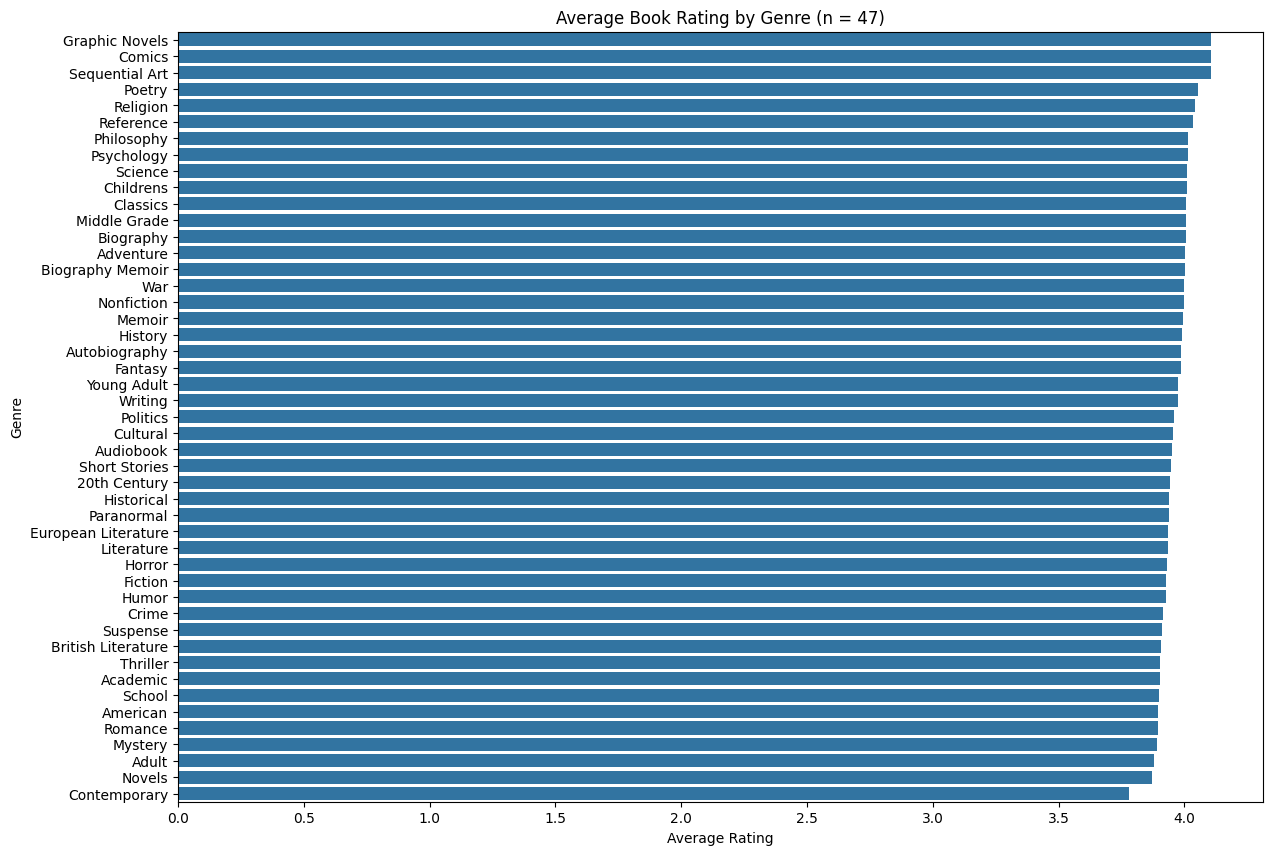

In [12]:
### calculate average rating per genre ###
books_grouped = books_filtered.groupby("genre")

average_review_genre = books_grouped["average_rating"].mean().sort_values(ascending = False)

### plot barplot of average rating per genre ###
plt.figure(figsize=(14, 10))

sns.barplot(
    x=average_review_genre.values,
    y=average_review_genre.index
)


plt.xlabel("Average Rating")
plt.ylabel("Genre")
plt.title(f"Average Book Rating by Genre (n = {len(average_review_genre)})")
# can also use books_grouped.ngroups to calculate number of genres
plt.show()

It is visible from the bar graph that Sequential Art, Graphic Novels, Comics, Religion, and Poetry are the highest rated genres on average (rating of > 4.0 approx.). We can also see that the lowest rated from this list are Contemporary, Adult, Novels, Mystery and Romance. **Fantasy** sits at place no. 21 out of 47. 

These insights are difficult to interpret without considering genre popularity, i.e. the number of books represented in each genre. Therefore we will move on to **Question 5**.

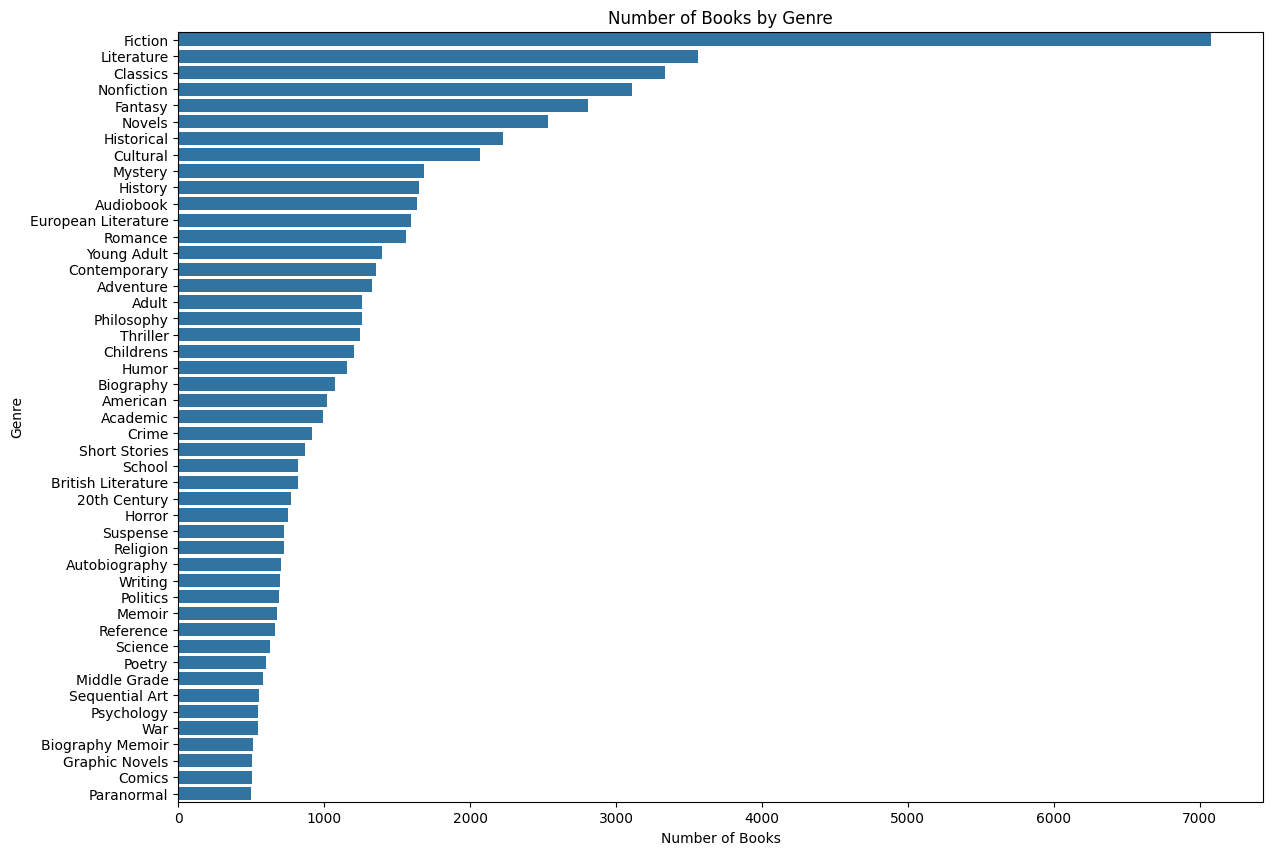

In [13]:
counts = books_filtered.groupby("genre")["Book Id"].nunique().sort_values(ascending=False)
plt.figure(figsize=(14, 10))
sns.barplot(x = counts.values, y = counts.index)

plt.xlabel("Number of Books")
plt.ylabel("Genre") 
plt.title("Number of Books by Genre")
plt.show()

Graphic Novels and Comics are two of the least popular genres within our data, found in approximately 500 books. Sequential Art, Poetry, and Religion are visible around the bottom part of the plot ( <800 books) - not the least popular but still not considered popular.

Linking these findings back to our previous conclusion, it seems that popularity does not necessarily mean higher ratings, since for example Graphic Novels was the highest rated out of all the genres but is found at the bottom of this plot, i.e. not more than ~ 500 books are Graphic Novels, and is therefore not a popular genre. 
Thus, we have evidence to assume that there is no significant relationship between popularity and high ratings. 

Let's test that theory with a **scatterplot**.

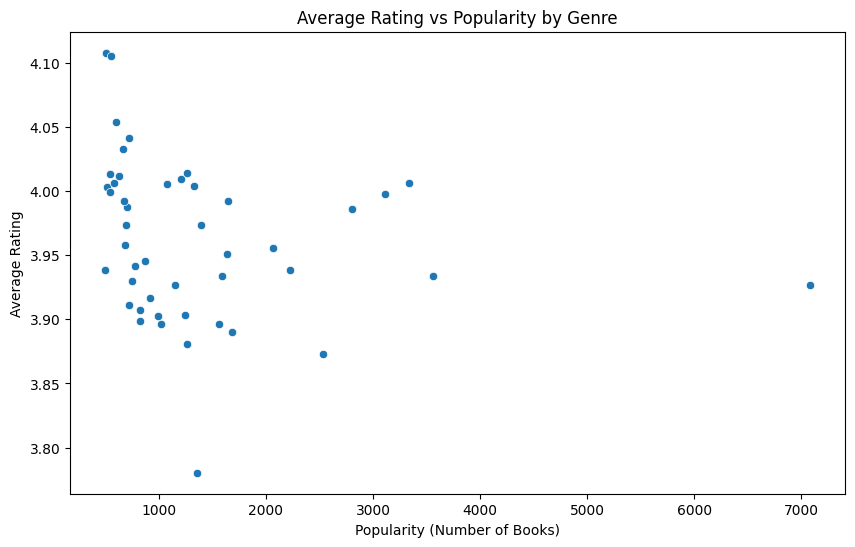

In [14]:
plt.figure(figsize=(10, 6))
# order by genre
df_scatter = pd.DataFrame({
    "count": counts,
    "average_rating": average_review_genre
}).sort_index()


sns.scatterplot(x = df_scatter["count"].values, y = df_scatter["average_rating"].values)

plt.xlabel("Popularity (Number of Books)")
plt.ylabel("Average Rating")
plt.title("Average Rating vs Popularity by Genre")
plt.show()  

 There is no clear/strong relationship between Average Ratings and Popularity from this plot. To support this claim, Pearson and Spearman correlations will be computed.

Pearson r, p: PearsonRResult(statistic=np.float64(-0.22679671407241347), pvalue=np.float64(0.1252695578708776))
Spearman rho, p: SignificanceResult(statistic=np.float64(-0.4514338575393154), pvalue=np.float64(0.0014475982318592603))


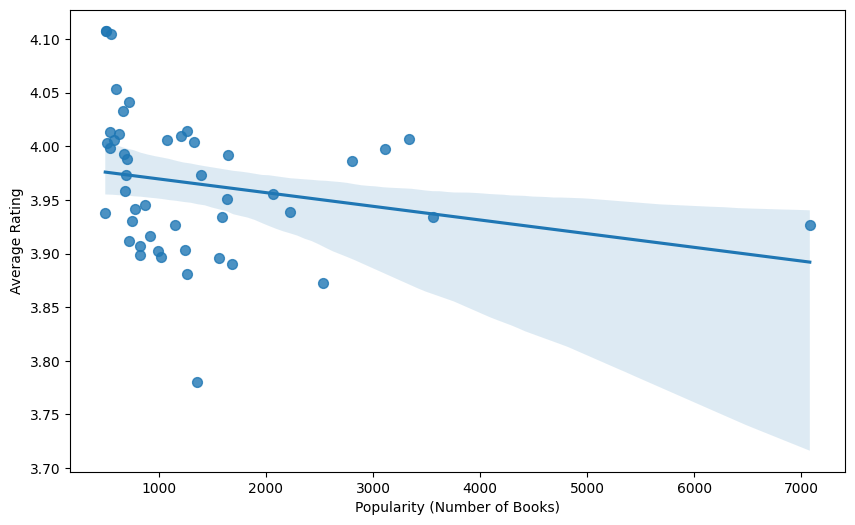

In [15]:
# compute Pearson and Spearman correlations
import scipy.stats as stats

pearson = stats.pearsonr(df_scatter["count"].values, df_scatter["average_rating"].values)
spearman = stats.spearmanr(df_scatter["count"].values, df_scatter["average_rating"].values)
print("Pearson r, p:", pearson)
print("Spearman rho, p:", spearman)

# show regression line on the scatter
plt.figure(figsize=(10,6))
sns.regplot(x=df_scatter["count"], y=df_scatter["average_rating"], scatter_kws={"s":50})
plt.xlabel("Popularity (Number of Books)")
plt.ylabel("Average Rating")
plt.show()

Both Pearson and Spearman correlations were computed to assess the relationship between genre popularity and average rating. Pearson
correlation evaluates linear association, while Spearman correlation assesses monotonic relationships based on ranked values.

While the Pearson correlation is not statistically significant (p-value is 0.125) given α = 0.05, the Spearman correlation indicated a moderate, statistically significant negative association (p-value is 0.001). This pattern suggests that genres with more books tend to have slightly lower average ratings, not because they are lower quality, but because larger sample sizes lead to more stable averages. Smaller genres are more prone to inflated ratings due to niche audiences and limited samples.

Moving on to the remaining question, **Question 3**.

<Axes: xlabel='language'>

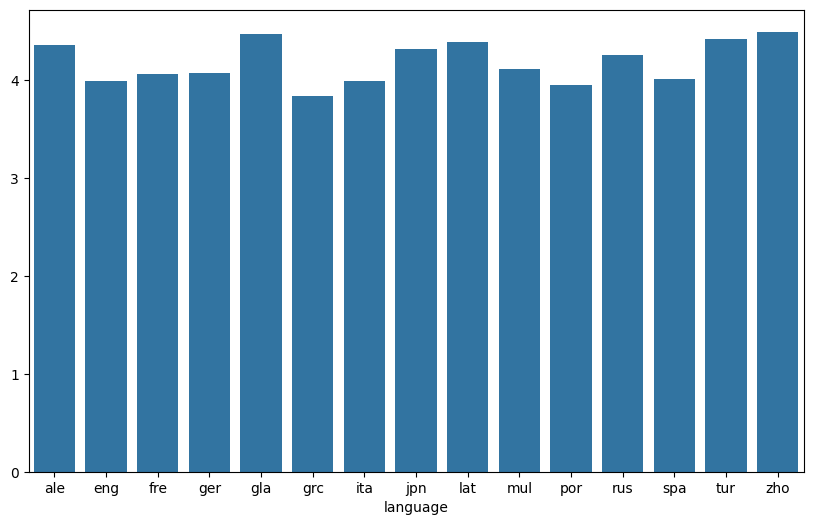

In [36]:
fantasy_books = books_exploded1[books_exploded1["genre"] == "Fantasy"].copy()
# if language is en-us, updated to eng
fantasy_books["language"] = fantasy_books["language_code"].replace("en-US", "eng")
fantasy_books["language"] = fantasy_books["language"].replace("en-GB", "eng")
fantasy_books["language"] = fantasy_books["language"].replace("en-CA", "eng")
fantasy_books["language"].nunique()

# we have 15 unique languages

# lets compute the average rating for each language
lang_review = fantasy_books.groupby("language")["average_rating"].mean()
plt.figure(figsize=(10,6))
sns.barplot(x = lang_review.index, y = lang_review.values)